![](../images/studio_g.jpeg)
<br>
Photo: [*Studio G*](http://www.studiogbrooklyn.com/studio/)

# The Sound of Science
### Notebook 3: Exploratory Data Analysis
#### Adam Zucker
---

## Contents
- **Section 1:** Package and data imports
- **Section 2:** Visualizations

---
---
### Section 1
#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import os
import IPython.display as ipd

import librosa as lib
import librosa.display as libd

In [2]:
# Importing cleaned Spotify dataframe
df = pd.read_csv('../data_clean/spotify_kg_master.csv')
df.head()

,name,artists,tempo,key,mode,full_key,A minor,A# major,A# minor,B major,...,energy,instrumentalness,speechiness,acousticness,danceability,valence,popularity,liveness,year,id
0,Thunderstruck,['AC/DC'],133.5,4,1,E major,0,0,0,0,...,0.890,0.01170,0.0364,0.000147,0.502,0.259,83,0.217,1990,57bgtoPSgt236HzfBOd8kj
1,The Gift of Love,['Bette Midler'],157.5,8,1,G# major,0,0,0,0,...,0.467,0.00000,0.0287,0.359000,0.486,0.286,38,0.110,1990,7FUc1xVSKvABmVwI6kS5Y4
2,Thelma - Bonus Track,['Paul Simon'],94.0,5,1,F major,0,0,0,0,...,0.529,0.08450,0.0770,0.872000,0.710,0.882,29,0.093,1990,7pcEC5r1jVqWGRypo9D7f7
3,How I Need You,['Bad Boys Blue'],123.1,9,0,A minor,1,0,0,0,...,0.670,0.00347,0.0398,0.072400,0.652,0.963,44,0.119,1990,1yq8h4zD0IDT5X1YTaEwZh
4,Nunca Dudes De Mi,['El Golpe'],143.1,4,1,E major,0,0,0,0,...,0.490,0.00000,0.0295,0.151000,0.476,0.514,31,0.305,1990,5kNYkLFs3WFFgE6qhfWDEm


---
---
### Section 2
#### Visualizations

In [3]:
df.columns

Index(['name', 'artists', 'tempo', 'key', 'mode', 'full_key', 'A minor',
       'A# major', 'A# minor', 'B major', 'B minor', 'C major', 'C minor',
       'C# major', 'C# minor', 'D major', 'D minor', 'D# major', 'D# minor',
       'E major', 'E minor', 'F major', 'F minor', 'F# major', 'F# minor',
       'G major', 'G minor', 'G# major', 'G# minor', 'loudness', 'duration_s',
       'energy', 'instrumentalness', 'speechiness', 'acousticness',
       'danceability', 'valence', 'popularity', 'liveness', 'year', 'id'],
      dtype='object')

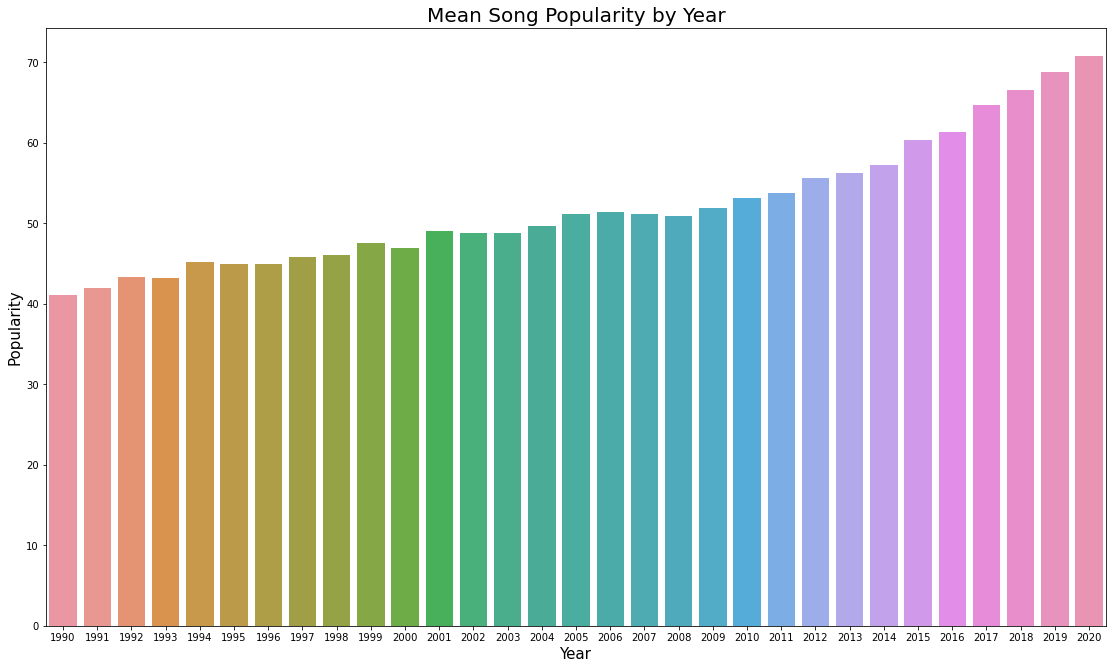

In [40]:
# Plotting mean popularity by year
plt.figure(figsize=(19, 11))

sns.barplot(data=df, x='year', y='popularity', ci=None)

plt.xlabel('Year', size=15)
plt.ylabel('Popularity', size=15)
plt.title('Mean Song Popularity by Year', size=20);

**ABOVE:** This plot shows the mean `popularity` of songs by year. According to [Spotify's](https://developer.spotify.com/documentation/web-api/reference/) definition:
> The **popularity** of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

The general trend in popularity over year increases, which makes sense based on Spotify's definition, as they factor the recentness of the release as well as the streaming numbers into their `popularity` feature.

---

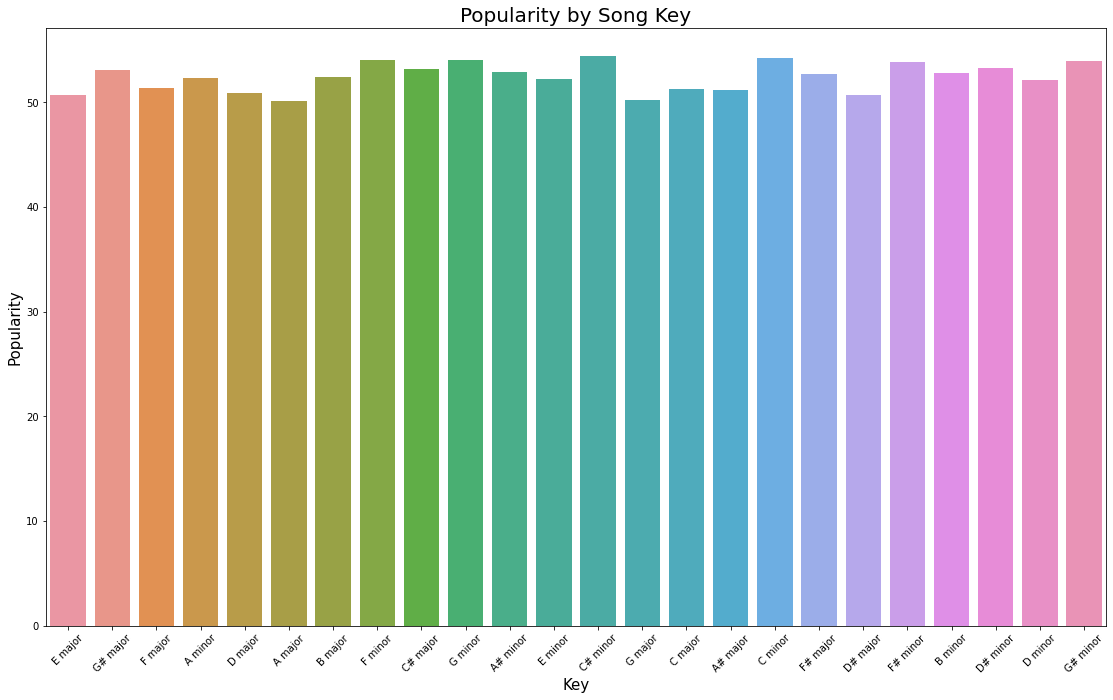

In [41]:
plt.figure(figsize=(19, 11))

sns.barplot(data=df, x='full_key', y='popularity', ci=None)
plt.xlabel('Key', size=15)
plt.ylabel('Popularity', size=15)
plt.xticks(rotation=45)
plt.title('Popularity by Song Key', size=20);

**ABOVE:** According to the song keys detected by Spotify's algorithm, all are fairly evenly distributed with respect to popularity, meaning no subset of musical keys appear to have a significantly stronger correlation with a song's success than any others. This result is to be taken with a grain of salt, as I've determined Spotify's `key` algorithm is not always accurate.

---

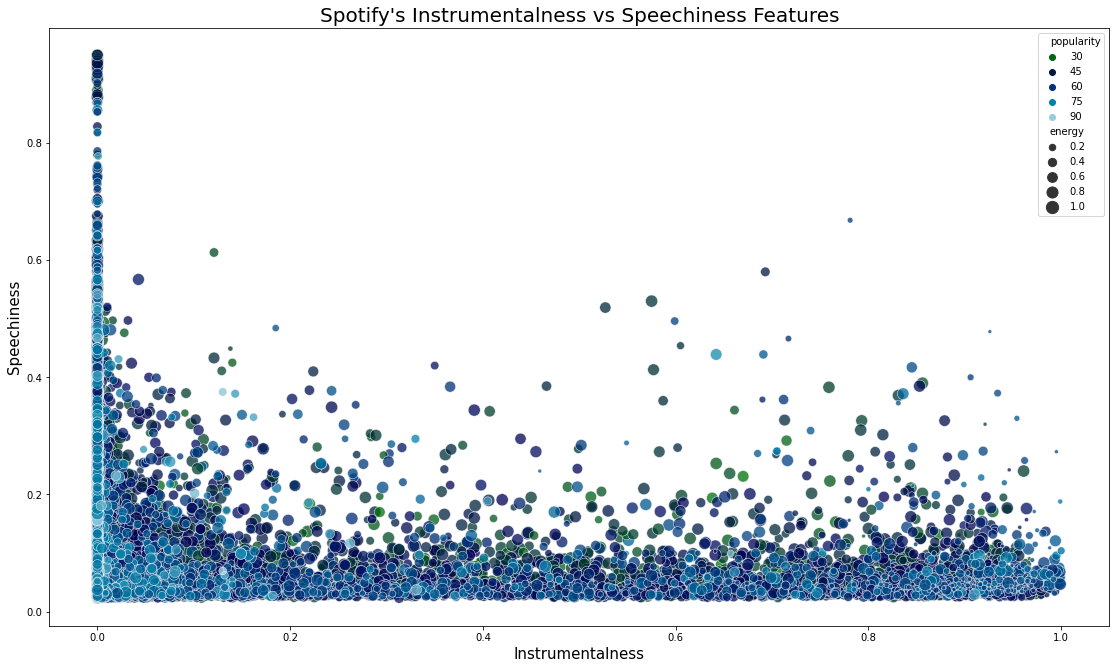

In [44]:
# Plotting Spotify's 'instrumentalness' against its 'speechiness' features
plt.figure(figsize=(19, 11))

sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='popularity', size='energy', sizes=(15, 150), palette='ocean', alpha=0.75)
plt.xlabel('Instrumentalness', size=15)
plt.ylabel('Speechiness', size=15)
plt.title("Spotify's Instrumentalness vs Speechiness Features", size=20);

**ABOVE:** This scatterplot shows Spotify's `instrumentalness` and `speechiness` features plotted on the x- and y-axes respectively, along with song `popularity` (based on the point's color) and `energy` (based on the point's size). Below are Spotify's definitions for the primary features of this plot:
> - **Instrumentalness:** Predicts whether a track contains vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
> 
> - **Speechiness:** Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Interestingly, values for `instrumentalness` are spread between 0 and 1, with the highest concentration at the extremes of its range (though as we'll see in the following boxplots, `instrumentalness` is actually quite frequently close to 0). Additionally, the vast majority of tracks with any `instrumentalness` greater than 0 seem to have an extremely low `speechiness` score. Conversely, the only tracks with meium and high `speechiness` scores are concentrated at 0 on the `instrumentalness` scale.

This makes some sense given Spotify's definitions, but I do think it represents a crucial error in the way they measure these metrics. If these were binary values of 0 *or* 1, then the concentration of `speechiness` values at 0 would be much more reasonable. However, most tracks contain a mix of instrumentation and speech, expecially in the case of rap, and much of modern pop music. Additionally, I would expect these two features to have an inverse relationship - as `instrumentalness` increases, I would expect `speechiness` to decrease at a similar rate. However, we see this is not the case. While there's tons of variation in `instrumentalness`, `speechiness` is fairly static.

In [42]:
df[(df['instrumentalness'] >= 0.6) & (df['speechiness'] >= 0.6)]

,name,artists,tempo,key,mode,full_key,A minor,A# major,A# minor,B major,...,energy,instrumentalness,speechiness,acousticness,danceability,valence,popularity,liveness,year,id
51170,summer nights.,"['halberd', 'Nion']",84.0,7,1,G major,0,0,0,0,...,0.127,0.781,0.668,0.939,0.782,0.39,61,0.125,2017,7pDspg2l98EwYQRcBpmQWK


**ABOVE:** There's only one song in my entire dataframe with an `instrumentalness` and `speechiness` greater than 0.6. This song, [Summer Nights](https://www.youtube.com/watch?v=LoJxoC10V9k) is a rap track, with a healthy amount of vocals and instrumentation. Though this is clearly an outlier, I'd expect more values like this that show a balance of both characteristics.

In [46]:
# Only 13 songs out of almost 60,000 have an 'instrumentalness' and 'speechiness' of 0.4 or greater
df[(df['instrumentalness'] >= 0.4) & (df['speechiness'] >= 0.4)]

,name,artists,tempo,key,mode,full_key,A minor,A# major,A# minor,B major,...,energy,instrumentalness,speechiness,acousticness,danceability,valence,popularity,liveness,year,id
6715,3 Lil' Putos,['Cypress Hill'],181.8,3,1,D# major,0,0,0,0,...,0.83100,0.527,0.519,0.0170,0.715,0.5780,42,0.3470,1993,5HNWXHeqgZII2dC3YwjUaE
11030,(-) Ions,['TOOL'],127.1,9,1,A major,0,0,0,0,...,0.56700,0.693,0.580,0.9380,0.223,0.0301,45,0.3230,1996,0KCdkjFn7as5rME8dInqGQ
13853,Center of Gravity,['Yo La Tengo'],159.6,2,1,D major,0,0,0,0,...,0.35600,0.605,0.454,0.1650,0.816,0.9680,42,0.0706,1997,6OGjWY39HlMdrF5bNeikkG
24465,Hypnotize,['The White Stripes'],184.1,9,1,A major,0,0,0,0,...,0.99000,0.575,0.530,0.0355,0.191,0.4470,41,0.0679,2003,52vZfFJ4ZKLDabaTAH242l
28158,Pour Me Another,['Atmosphere'],173.6,9,0,A minor,1,0,0,0,...,0.91300,0.577,0.413,0.0045,0.373,0.4220,41,0.1330,2005,73qTY37DubCELdONrpQqYg
47820,Sunday Vibes,['Wünsche'],80.0,0,0,C minor,0,0,0,0,...,0.19800,0.717,0.466,0.6430,0.600,0.6380,57,0.0910,2016,3fI1DEUK7gml9W6iFntNel
49079,oneofone_rwrk,['eli filosov [ p h i l o ]'],84.0,0,1,C major,0,0,0,0,...,0.40600,0.599,0.496,0.8370,0.653,0.2530,62,0.1950,2016,6NV1Gv85xTIeUuj1xbgVEJ
49776,Rain Sounds,['Wp Sounds'],113.3,1,1,C# major,0,0,0,0,...,0.00169,0.926,0.478,0.0753,0.228,0.0227,66,0.2870,2017,3OhZdTcwr8eho3iol2YqMy
51170,summer nights.,"['halberd', 'Nion']",84.0,7,1,G major,0,0,0,0,...,0.12700,0.781,0.668,0.9390,0.782,0.3900,61,0.1250,2017,7pDspg2l98EwYQRcBpmQWK
52280,Womb Sound With Mother's Heartbeat and Sleep P...,['Womb Sound'],68.6,10,0,A# minor,0,0,1,0,...,0.50100,0.691,0.439,0.9440,0.284,0.1690,67,0.1080,2018,6DCxsitO66sRaPLAZJMFkT


---

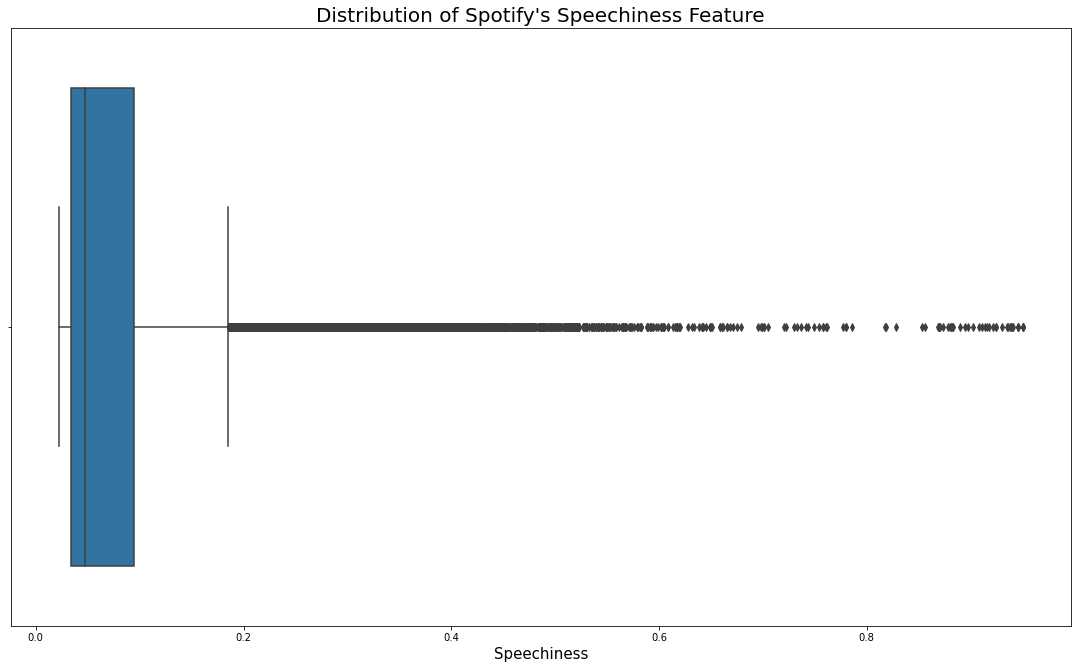

In [8]:
# Generating boxplot of 'speechiness' feature
plt.figure(figsize=(19, 11))

sns.boxplot(x=df['speechiness'])
plt.xlabel('Speechiness', size=15)
plt.title("Distribution of Spotify's Speechiness Feature", size=20);

**ABOVE:** Though there are quite a few outliers, the vast majority of tracks in the Spotify dataframe have an extremely low value for the `speechiness` feature. This makes some degree of sense according to Spotify's definition:
> **Speechiness** detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

As I've narrowed this dataframe down to music, we'd expect `speechiness` to skew low - largely below Spotify's cutoff of 0.33 for most music. However, I also noticed some unusually low values in this feature, which stood out as especially strange when dealing with rap and hip-hop. While some of these tracks have a higher `speechiness` score, quite a few also approach 0, which does not seem like an accurate measurement to me.
<br>
<br>

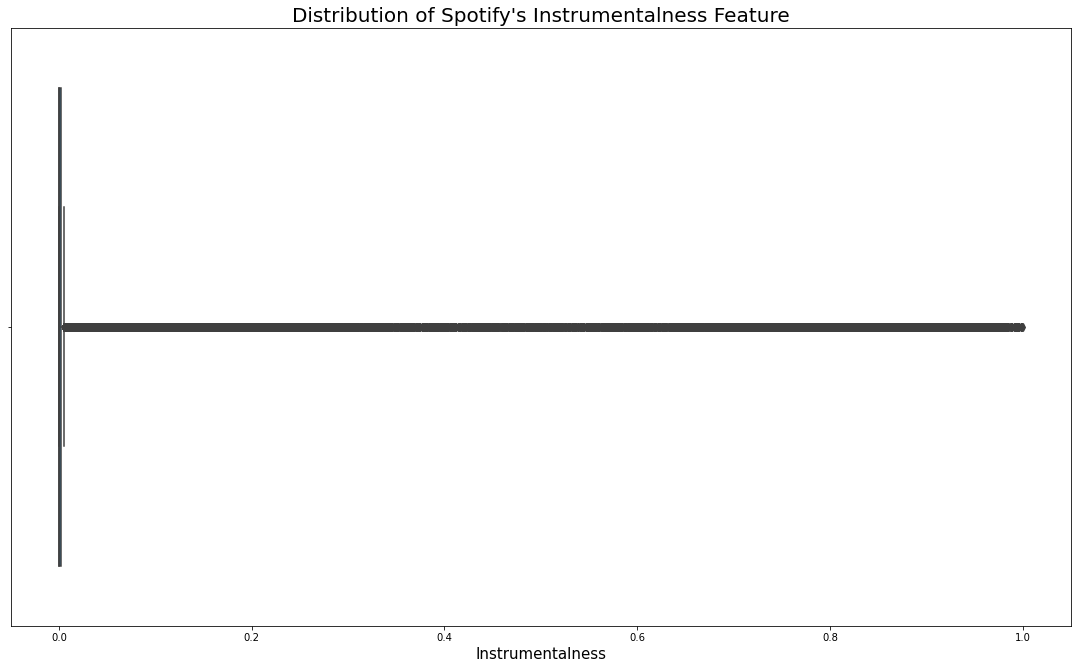

In [9]:
# Generating boxplot of 'speechiness' feature
plt.figure(figsize=(19, 11))

sns.boxplot(x=df['instrumentalness'])
plt.xlabel('Instrumentalness', size=15)
plt.title("Distribution of Spotify's Instrumentalness Feature", size=20);

**ABOVE:** As with `speechiness`, `instrumentalness` skews extremely low - the vast majority of entries are approaching 0. Spotify defines this metric as:
> **Instrumentalness** predicts whether a track contains vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

This plot is not what I would've expected. Though values larger than 0.5 are meant to represent fully instrumental pieces, I'd still expect to see more instrumentation detected in almost every popular genre, since most pop songs are a healthy mix of vocals and musical components. This surprises me especially with the rise in popularity and prevalence of electronic dance music over the last 10 years or so, which is often composed of shorter vocal segments with long instrumental dance breaks. Again here, this leads me to conclude that Spotify's metric is flawed to some degree, in that it doesn't account well for the "middle ground" between a song with vocals and an entirely instrumental piece.

The summary statistics **below** for the `instrumentalness` feature seem to reinforce my interpretation of this plot.

In [10]:
df[['instrumentalness']].describe()

,instrumentalness
count,56798.000000
mean,0.080194
std,0.227177
min,0.000000
25%,0.000000
50%,0.000008
75%,0.002130
max,1.000000


---

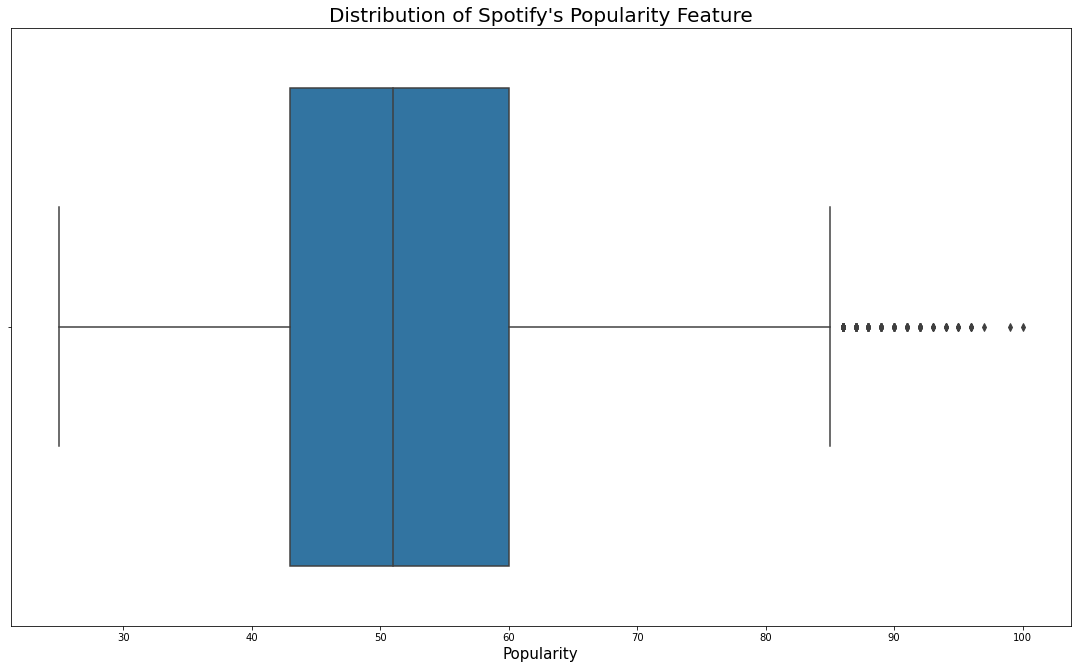

In [20]:
# Generating boxplot of 'popularity' feature
# The findings from this graph are expected based on the filtering I did of the original dataframe in Notebook 1
plt.figure(figsize=(19, 11))

sns.boxplot(x=df['popularity'])
plt.xlabel('Popularity', size=15)
plt.title("Distribution of Spotify's Popularity Feature", size=20);

---

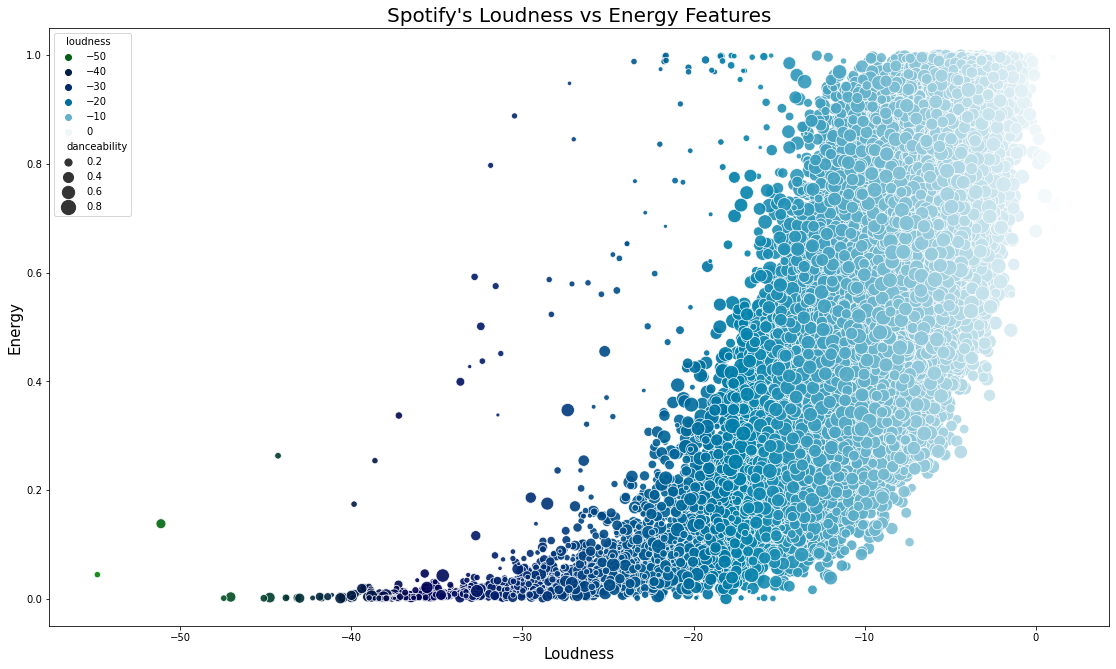

In [12]:
# Plotting 'loudness' against 'energy'
plt.figure(figsize=(19, 11))

sns.scatterplot(data=df, x='loudness', y='energy', hue='loudness', size='danceability', sizes=(15, 250), palette='ocean', alpha=0.9)
plt.xlabel('Loudness', size=15)
plt.ylabel('Energy', size=15)
plt.title("Spotify's Loudness vs Energy Features", size=20);

**ABOVE:** This is a scatterplot showing `loudness` against `energy`. Spotify's definitions for each are as follows:
> - **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.
>
> - **Energy:** A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

---

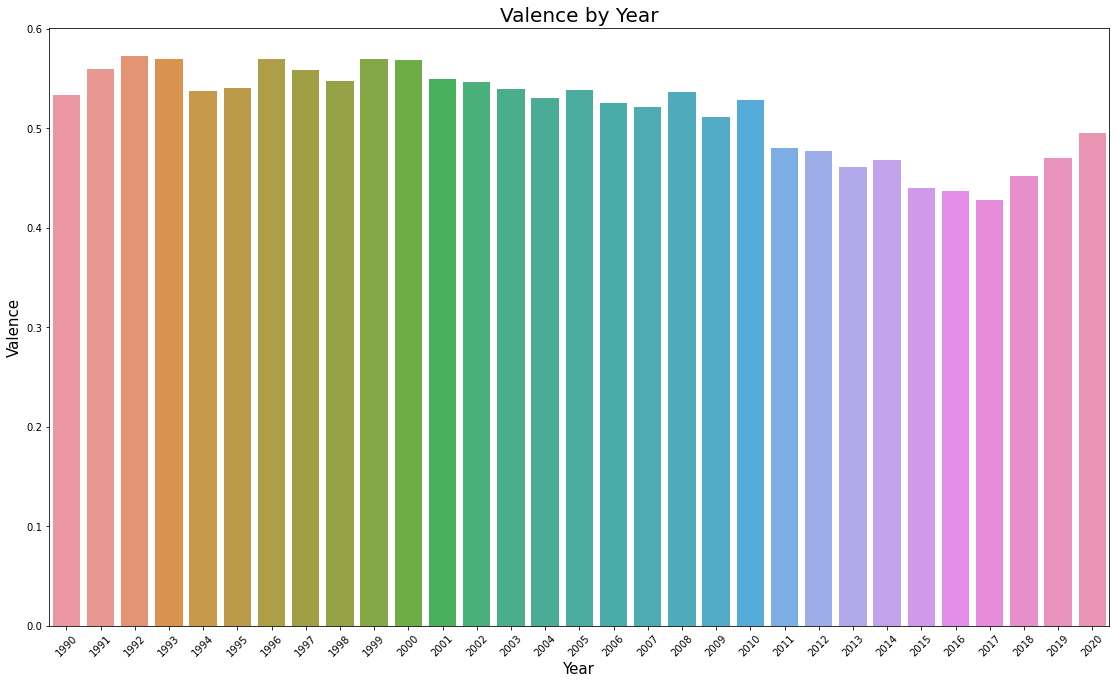

In [47]:
plt.figure(figsize=(19, 11))

sns.barplot(data=df, x='year', y='valence', ci=None)

plt.xlabel('Year', size=15)
plt.ylabel('Valence', size=15)
plt.xticks(rotation=45)
plt.title('Valence by Year', size=20);

**ABOVE:** This plot shows Spotify's `valence` metric averaged by year. Spotify defines this metric as follows:
> **Valence** is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

I think it's both interesting and somewhat unsurprising that `valence` has slowly decreased year over year, insinuating music has gotten "sadder" in recent years. With the destigmatization of depression and other mental health concerns, the markedly higher rate of depression among artists, and a poor global economic climate, sociopolitical climate, and literal climate, I was actually expecting to see a larger dip in the 2010s.

It's also interesting to note that, according to Spotify, music has become more positive year over year since 2017. This is not a trend I would've expected, for the same reasons as above.